## Logistic Regression From Scratch (One class)

### Import

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Data

In [116]:
df = pd.read_csv("Data/exam.csv")
x_train , x_test , y_train , y_test = train_test_split(df[['study_hours']].values , df[['pass_fail']].values , test_size=0.3 , random_state=16)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((14, 1), (6, 1), (14, 1), (6, 1))

### Functions

In [117]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_reg(w , x):
    y_hat = sigmoid(x@w)
    return y_hat

def bce(y , y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

def gradient(x , y , y_hat):
    grads = ( x.T @ (y_hat - y) ) / len(y)
    return grads

def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

### Train Model

In [118]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))

x_train , x_test 

(array([[1.  , 1.75],
        [1.  , 1.  ],
        [1.  , 2.25],
        [1.  , 2.75],
        [1.  , 0.5 ],
        [1.  , 5.5 ],
        [1.  , 5.  ],
        [1.  , 3.5 ],
        [1.  , 1.5 ],
        [1.  , 3.  ],
        [1.  , 0.75],
        [1.  , 1.75],
        [1.  , 4.  ],
        [1.  , 2.5 ]]),
 array([[1.  , 1.25],
        [1.  , 4.75],
        [1.  , 4.5 ],
        [1.  , 4.25],
        [1.  , 3.25],
        [1.  , 2.  ]]))

In [119]:
n , m = x_train.shape
w = np.random.randn(m , 1)

In [120]:
import joblib

loss_train_hist, loss_test_hist = [], []
best_loss = np.inf
n_es = 0
n_epochs = 1000
eta = 0.02

for epoch in range(n_epochs):
    # predictions
    y_hat_train = logistic_reg(w, x_train)
    y_hat_test = logistic_reg(w, x_test)
    
    # loss
    loss_train = bce(y_train , y_hat_train)
    loss_train_hist.append(loss_train)
    
    loss_test = bce(y_test , y_hat_test)
    loss_test_hist.append(loss_test)

    # gradients
    grads = gradient(x_train , y_train , y_hat_train)

    # gradient descent
    w = gradient_descent(w , eta , grads)

    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        joblib.dump(w, 'best-model.joblib')
        best_epoch = epoch
        n_es = 0
    else:
        n_es += 1
        if n_es >= 5:
            break
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}, \t w={w.T[0]}')

print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')


Epoch=99, 	 Loss_train=0.576,	 Loss_test=0.4716, 	 w=[-0.90133403  0.36743655]
Epoch=199, 	 Loss_train=0.5627,	 Loss_test=0.4477, 	 w=[-1.05505679  0.4207505 ]
Epoch=299, 	 Loss_train=0.5518,	 Loss_test=0.4297, 	 w=[-1.19552441  0.46522931]
Epoch=399, 	 Loss_train=0.5428,	 Loss_test=0.414, 	 w=[-1.32317986  0.50576815]
Epoch=499, 	 Loss_train=0.5353,	 Loss_test=0.4001, 	 w=[-1.43955721  0.54287678]
Epoch=599, 	 Loss_train=0.5291,	 Loss_test=0.3877, 	 w=[-1.54598393  0.57693998]
Epoch=699, 	 Loss_train=0.5238,	 Loss_test=0.3767, 	 w=[-1.64359586  0.60828906]
Epoch=799, 	 Loss_train=0.5193,	 Loss_test=0.3668, 	 w=[-1.73336734  0.63721058]
Epoch=899, 	 Loss_train=0.5156,	 Loss_test=0.3579, 	 w=[-1.81613711  0.66395309]
Epoch=999, 	 Loss_train=0.5123,	 Loss_test=0.3499, 	 w=[-1.89263003  0.6887329 ]
Best epoch:999, Best loss:0.3498820952367165


### Visualize

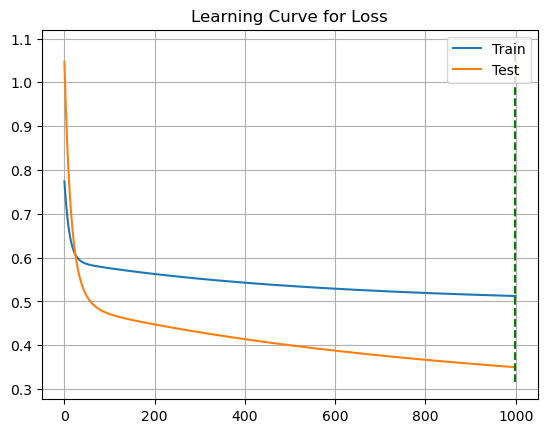

In [121]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

### Test Model 

In [122]:
y_hat_test = logistic_reg(w , x_test)
y_hat_test , y_test

(array([[0.26275196],
        [0.79880644],
        [0.76970886],
        [0.73778444],
        [0.58558705],
        [0.37398369]]),
 array([[0],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=int64))

In [123]:
print(f"accuracy: {accuracy(y_test , y_hat_test) * 100}%") 

accuracy: 100.0%
